# Water Quality Data Analysis, Variable Effects on Secchi Depth

### Secchi Depth is a measure of water clarity, often used in aquatic studies to assess the transparency of water. It refers to the depth at which a Secchi disk (a black-and-white circular disk) is no longer visible when lowered into the water. This measurement provides an indication of how much light can penetrate the water, which is important for understanding water quality and the health of aquatic ecosystems.


<div style="text-align: center;">
    <img src="Secchi_Disk.jpg" alt="Centered Image" />
</div>

#### My goal is to determine what factors contribute to Secchi Depth.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [4]:
#loading data from csv
#data sourced from U.S. Dept of the Interior (https://catalog.data.gov/dataset/water-quality-data-41c5e)
data = pd.read_csv('BKB_WaterQualityData_2020084.csv')

## Initial Data Check

In [6]:
#show first 5 rows of dataframe
data.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [7]:
#show number of rows/columns
data.shape

(2371, 17)

In [8]:
#statistical information about dataframe
data.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


#### Most means are higher than their medians, indicating a slightly positively skewed dataset. I expect to find either some outliers or a sharp increasing trend at some point.

In [10]:
#more granular information about the df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

In [11]:
#checkijng for nulls based on the results from .info()
data.isnull().sum()

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64

#### It looks like the columns Unit_Id, Air Temp-Celsius, DateVerified, and WhoVerified have enough nulls to where they will not be useful, so I will drop them.

## Clean Data

In [13]:
#verifying columns names
data.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [14]:
#dropping null columns
data.drop(columns=['Unit_Id', 'Air Temp-Celsius', 'DateVerified', 'WhoVerified'], inplace=True)

In [15]:
#verifying dataframe
data.head()

,Site_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),Time (24:00),Field_Tech,AirTemp (C),Year
0,Bay,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,46.40,11:00,NaN,8.0,1994
1,Bay,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,36.68,11:30,NaN,2.6,1994
2,Bay,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,45.68,9:45,NaN,7.6,1994
3,Bay,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,36.86,NaN,NaN,2.7,1994
4,Bay,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,32.00,10:30,NaN,0.0,1994


In [16]:
#filling numeric column's na values with median
numeric_cols = data.select_dtypes(include=['number'])
data[numeric_cols.columns] = numeric_cols.apply(lambda col: col.fillna(col.median()), axis=0)

In [17]:
#checking fillna
data.isnull().sum()

Site_Id                     1
Read_Date                   5
Salinity (ppt)              0
Dissolved Oxygen (mg/L)     0
pH (standard units)         0
Secchi Depth (m)            0
Water Depth (m)             0
Water Temp (?C)             0
Air Temp (?F)               0
Time (24:00)               63
Field_Tech                 39
AirTemp (C)                 0
Year                        0
dtype: int64

In [18]:
#renaming all columns to lower case
data.columns = data.columns.str.lower()

In [19]:
#renaming all columns to fit naming conventions
new_column_names = ['site_id', 'read_date', 'salinity', 'dissolved_oxygen', 'ph', 'secchi_depth', 'water_depth', 'water_temp', 'airtemp_f', 'time', 'field_tech', 'airtemp_c', 'year']

data.columns = new_column_names

In [20]:
#converting 'read_date' to datetime format
data['read_date'] = pd.to_datetime(data['read_date'])

In [21]:
#setting read_date column as index
data.set_index('read_date', inplace=True)

In [22]:
#verifying dataframe after changes
print(data.head())
print('*********************************')
print(data.shape)

           site_id  salinity  dissolved_oxygen   ph  secchi_depth  \
read_date                                                           
1994-01-03     Bay       1.3              11.7  7.3          0.40   
1994-01-31     Bay       1.5              12.0  7.4          0.20   
1994-02-07     Bay       1.0              10.5  7.2          0.25   
1994-02-23     Bay       1.0              10.1  7.4          0.35   
1994-02-28     Bay       1.0              12.6  7.2          0.20   

            water_depth  water_temp  airtemp_f   time field_tech  airtemp_c  \
read_date                                                                     
1994-01-03         0.40         5.9      46.40  11:00        NaN        8.0   
1994-01-31         0.35         3.0      36.68  11:30        NaN        2.6   
1994-02-07         0.60         5.9      45.68   9:45        NaN        7.6   
1994-02-23         0.50        10.0      36.86    NaN        NaN        2.7   
1994-02-28         0.40         1.6      3

## Data Exploration

#### Identify Outliers

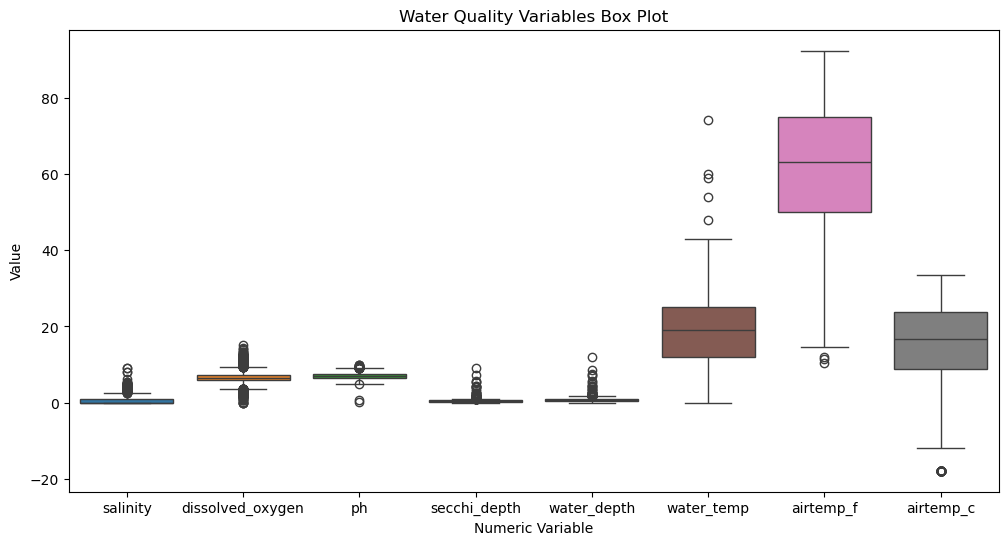

In [25]:
#boxplot all numeric variables without 'year'
data_noyear = data.drop(columns=['year'])

plt.figure(figsize=(12,6))
sns.boxplot(data=data_noyear)
plt.xlabel('Numeric Variable')
plt.ylabel('Value')
plt.title('Water Quality Variables Box Plot')
plt.show()

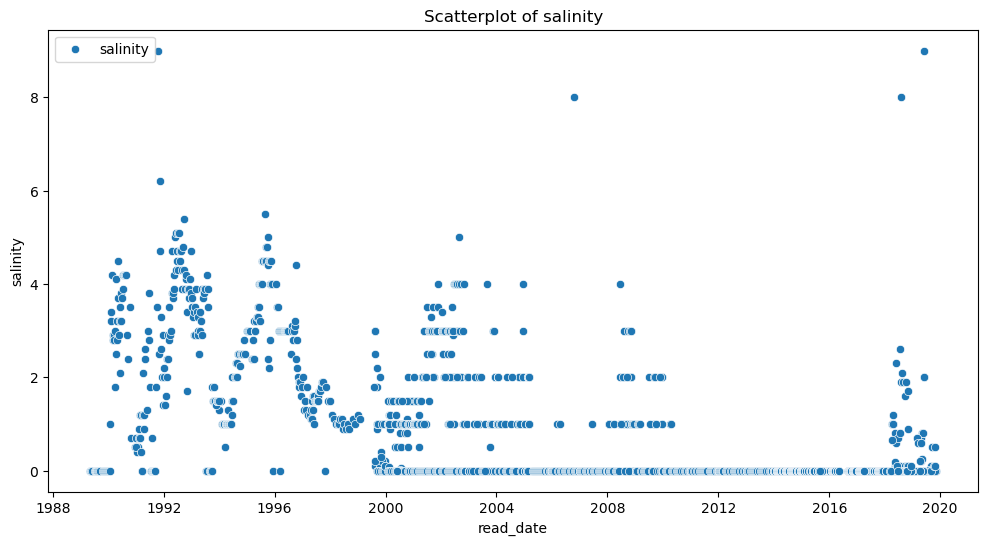

Skewness:2.060099567909931


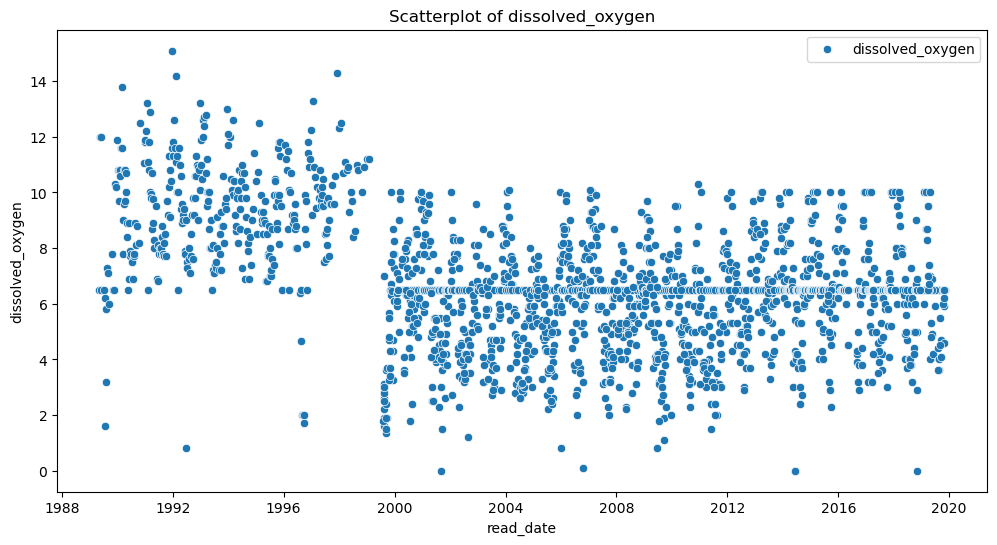

Skewness:0.3092108286206752


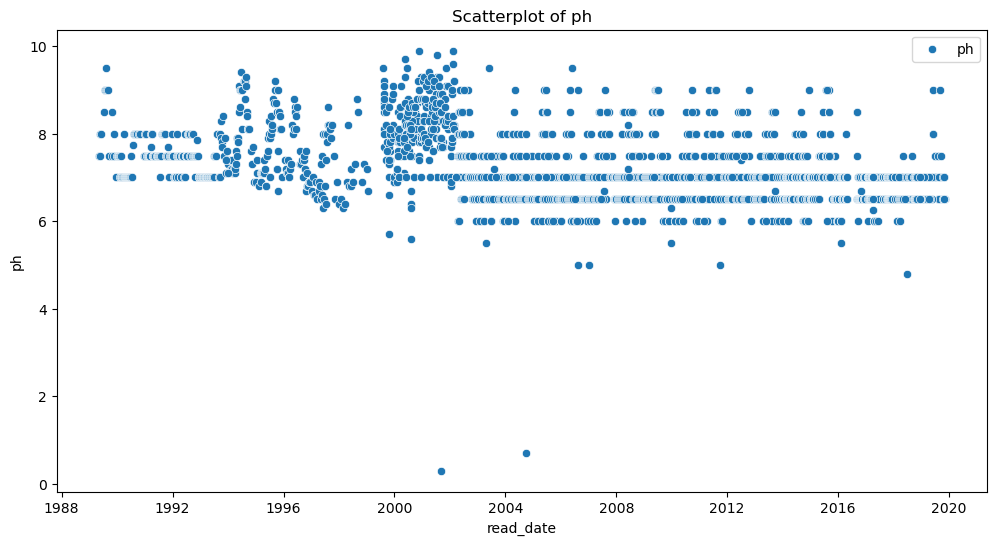

Skewness:0.30022748342874417


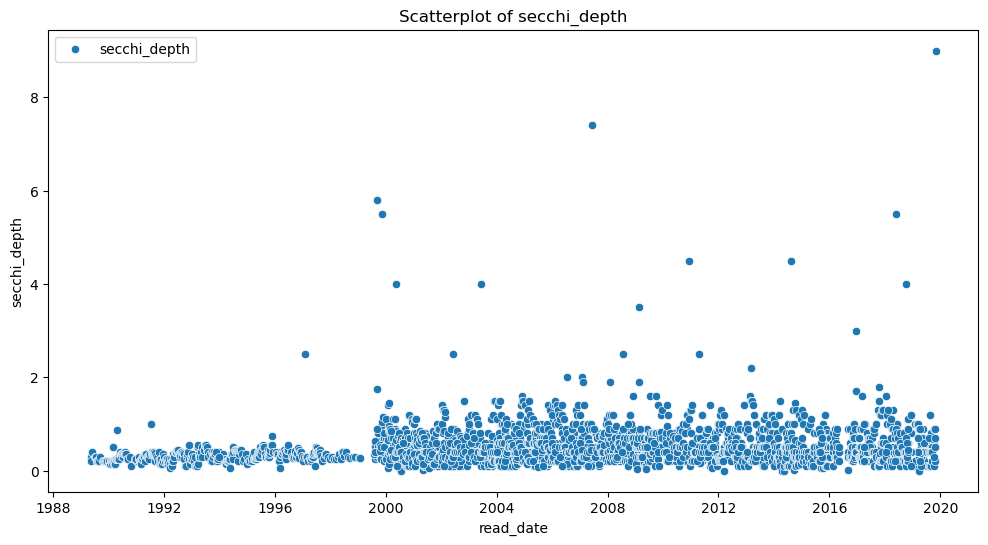

Skewness:7.172769892411577


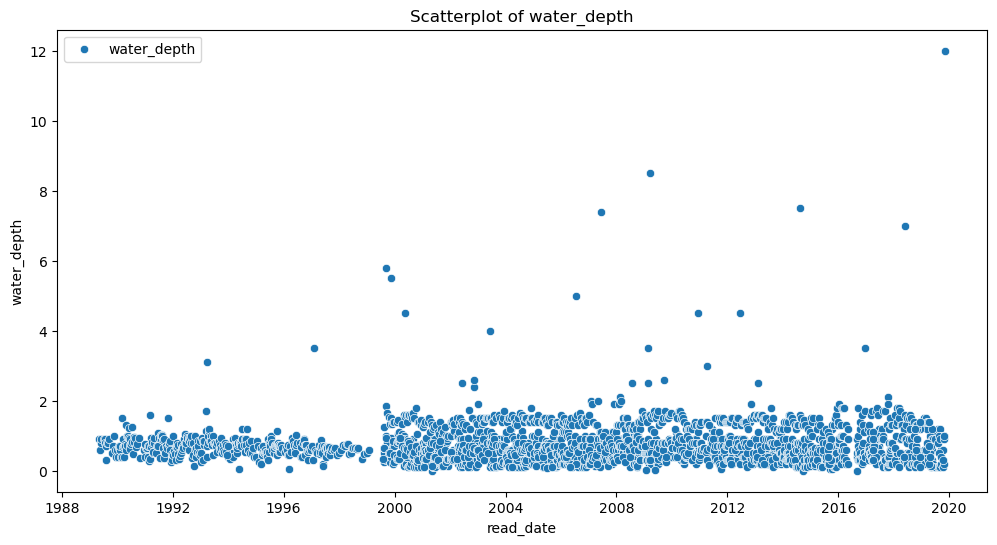

Skewness:6.29567053664881


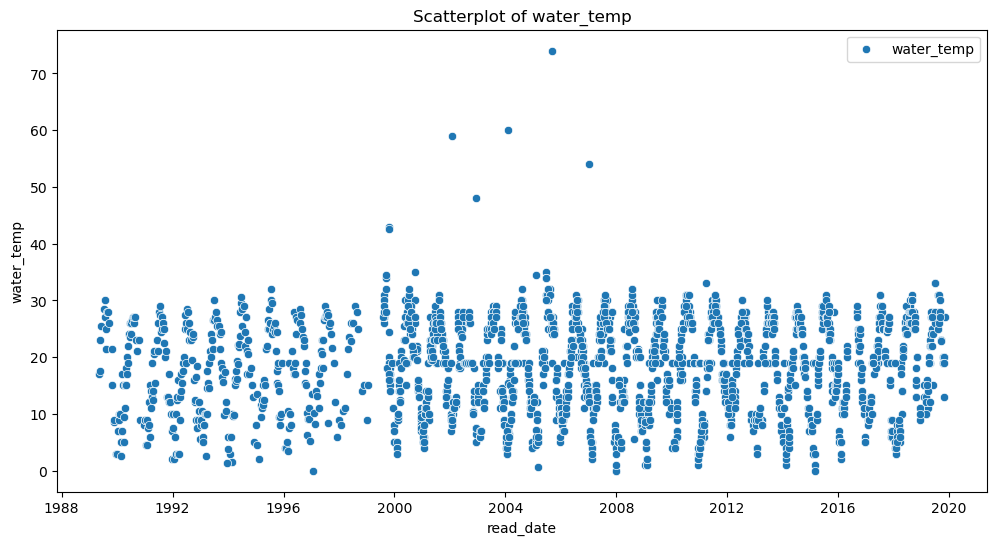

Skewness:0.12487453864935297


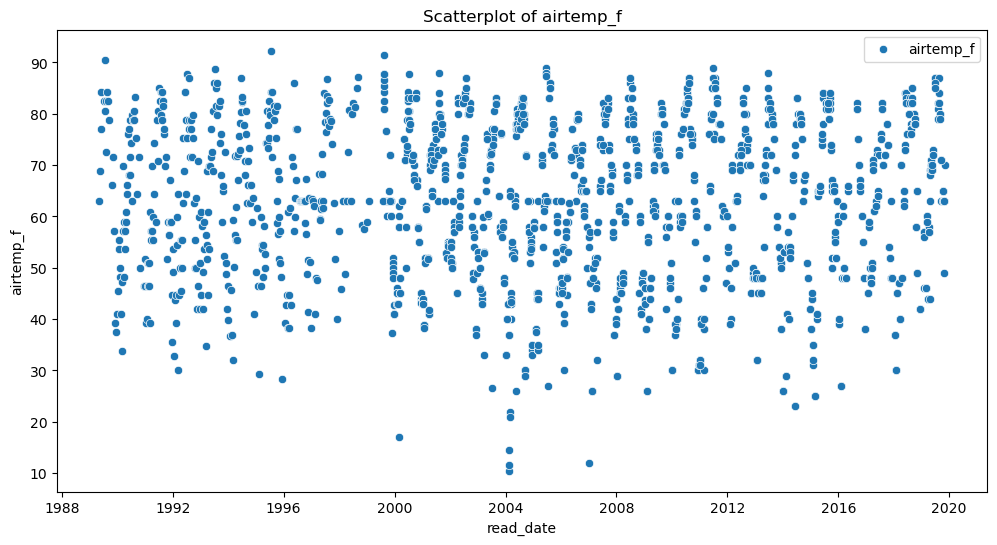

Skewness:-0.3702810160435749


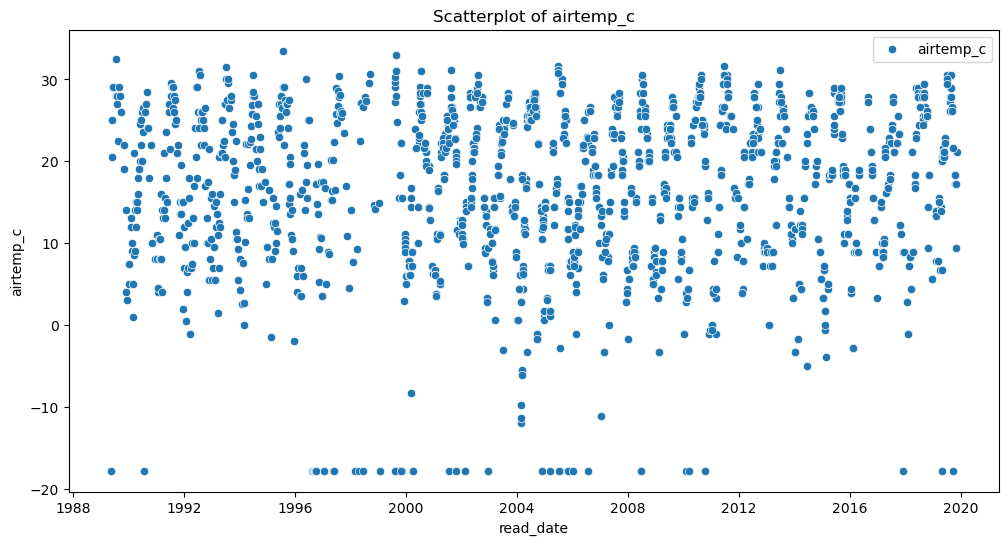

Skewness:-1.0202644765794233


In [26]:
#scatterplot of variables of interest
vars_of_int = ['salinity', 'dissolved_oxygen', 'ph', 'secchi_depth', 'water_depth', 'water_temp', 'airtemp_f', 'airtemp_c']

for var in vars_of_int:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=data_noyear[var], label=var)
    plt.ylabel(var)
    plt.title(f'Scatterplot of {var}')
    plt.show()
    print(f'Skewness:{data_noyear[var].skew()}')  #checking skewness

#### Considering the skewness of salinity (2.06), secchi depth (7.17), and water depth (6.29_, I am going to try to Winsorize those values. This means taking the outliers beyond 1st and 99th percentile and changing them to be the 1st or 99th percentile. This allow us to keep the outliers but try to reign them in to something more normal.

In [28]:
#winsorizing outlier values
lower = data_noyear['secchi_depth'].quantile(0.01)
upper = data_noyear['secchi_depth'].quantile(0.99)
data_noyear['secchi_depth'] = data_noyear['secchi_depth'].clip(lower, upper)

lower = data_noyear['salinity'].quantile(0.01)
upper = data_noyear['salinity'].quantile(0.99)
data_noyear['salinity'] = data_noyear['salinity'].clip(lower, upper)

lower = data_noyear['water_depth'].quantile(0.01)
upper = data_noyear['water_depth'].quantile(0.99)
data_noyear['water_depth'] = data_noyear['water_depth'].clip(lower, upper)

In [29]:
#checking skewness of winsorized values
winsorized = ['salinity', 'secchi_depth', 'water_depth']

for var in winsorized:
    print(f'{var} Skewness: {data_noyear[var].skew()}')

salinity Skewness: 1.754074359424424
secchi_depth Skewness: 1.4079420082433616
water_depth Skewness: 0.8756766434413384


## Univariate Analysis of Dependant Variable (Secchi Depth)

count    2371.000000
mean        0.502663
std         0.316377
min         0.100000
25%         0.300000
50%         0.400000
75%         0.600000
max         1.715000
Name: secchi_depth, dtype: float64


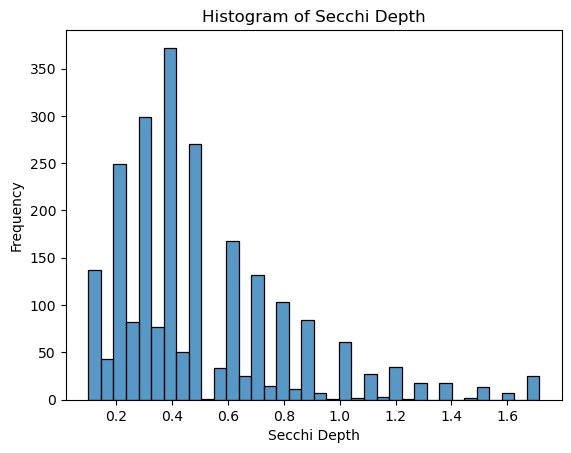

Skewness:1.4079420082433616


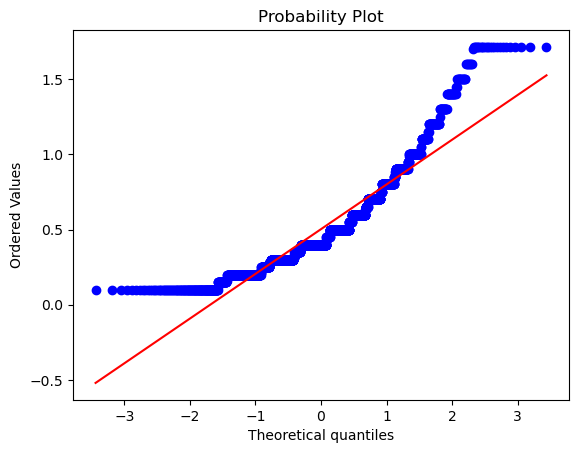

In [31]:
print(data_noyear['secchi_depth'].describe())

#histogram of secchi depth
sns.histplot(data_noyear['secchi_depth'])
plt.title('Histogram of Secchi Depth')
plt.xlabel('Secchi Depth')
plt.ylabel('Frequency')
plt.show()

#probability plot
pp = stats.probplot(data_noyear['secchi_depth'], plot=plt)

#checking skewness
print(f'Skewness:{data_noyear['secchi_depth'].skew()}')

#### With a less than normal distribution after winsorization, I wanted to try further to normalize the values by taking their log.

## Transformations

In [33]:
#creating new column for secchi_depth log
data_noyear['log_secchi'] = np.log(data_noyear['secchi_depth'])

In [34]:
#checking dataframe
data_noyear.head()

,site_id,salinity,dissolved_oxygen,ph,secchi_depth,water_depth,water_temp,airtemp_f,time,field_tech,airtemp_c,log_secchi
read_date,,,,,,,,,,,,
1994-01-03,Bay,1.3,11.7,7.3,0.40,0.40,5.9,46.40,11:00,NaN,8.0,-0.916291
1994-01-31,Bay,1.5,12.0,7.4,0.20,0.35,3.0,36.68,11:30,NaN,2.6,-1.609438
1994-02-07,Bay,1.0,10.5,7.2,0.25,0.60,5.9,45.68,9:45,NaN,7.6,-1.386294
1994-02-23,Bay,1.0,10.1,7.4,0.35,0.50,10.0,36.86,NaN,NaN,2.7,-1.049822
1994-02-28,Bay,1.0,12.6,7.2,0.20,0.40,1.6,32.00,10:30,NaN,0.0,-1.609438


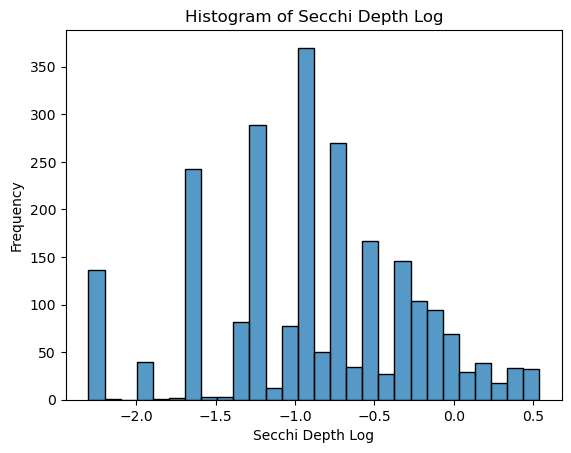

Skewness:-0.2601752874150264


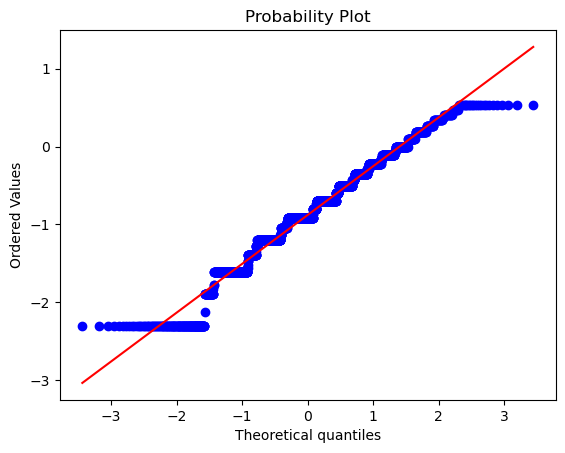

In [35]:
#histogram of log secchi depth
sns.histplot(data_noyear['log_secchi'])
plt.title('Histogram of Secchi Depth Log')
plt.xlabel('Secchi Depth Log')
plt.ylabel('Frequency')
plt.show()

#probability plot
pp = stats.probplot(data_noyear['log_secchi'], plot=plt)

#checking skewness
print(f'Skewness:{data_noyear['log_secchi'].skew()}')

#### It appears that the Log of the Secchi Depth value does behave more normally and shows less skew than the normal values. My next step is to perform the same transformations on Salinity and Water Depth. 

In [37]:
#replacing all 0 values in 'salinity' with 0.01 (the lowest value) to avoid issues in generating the log
data_noyear['salinity'] = data_noyear['salinity'].replace(0, 0.01)


In [38]:
#creating new columns for salinity and water depth logs
data_noyear['log_salinity'] = np.log(data_noyear['salinity'])
data_noyear['log_water_depth'] = np.log(data_noyear['water_depth'])

In [39]:
data_noyear.head()

,site_id,salinity,dissolved_oxygen,ph,secchi_depth,water_depth,water_temp,airtemp_f,time,field_tech,airtemp_c,log_secchi,log_salinity,log_water_depth
read_date,,,,,,,,,,,,,,
1994-01-03,Bay,1.3,11.7,7.3,0.40,0.40,5.9,46.40,11:00,NaN,8.0,-0.916291,0.262364,-0.916291
1994-01-31,Bay,1.5,12.0,7.4,0.20,0.35,3.0,36.68,11:30,NaN,2.6,-1.609438,0.405465,-1.049822
1994-02-07,Bay,1.0,10.5,7.2,0.25,0.60,5.9,45.68,9:45,NaN,7.6,-1.386294,0.000000,-0.510826
1994-02-23,Bay,1.0,10.1,7.4,0.35,0.50,10.0,36.86,NaN,NaN,2.7,-1.049822,0.000000,-0.693147
1994-02-28,Bay,1.0,12.6,7.2,0.20,0.40,1.6,32.00,10:30,NaN,0.0,-1.609438,0.000000,-0.916291


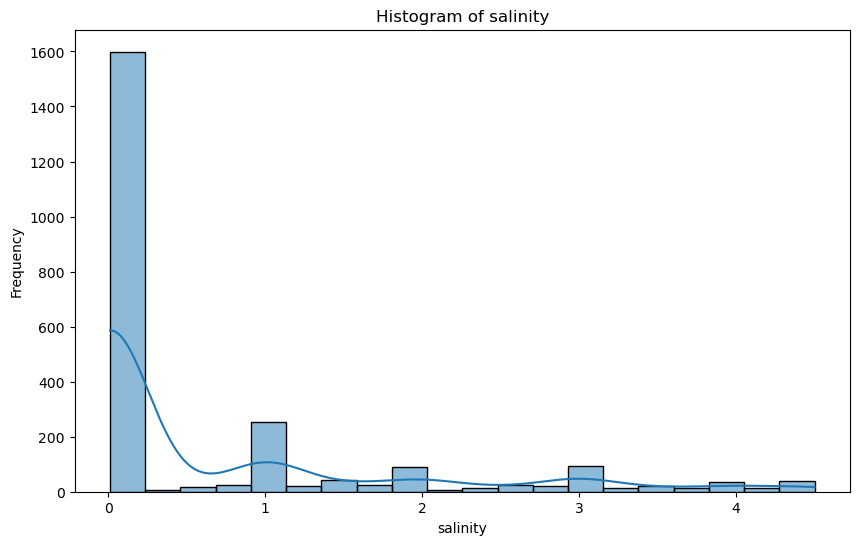

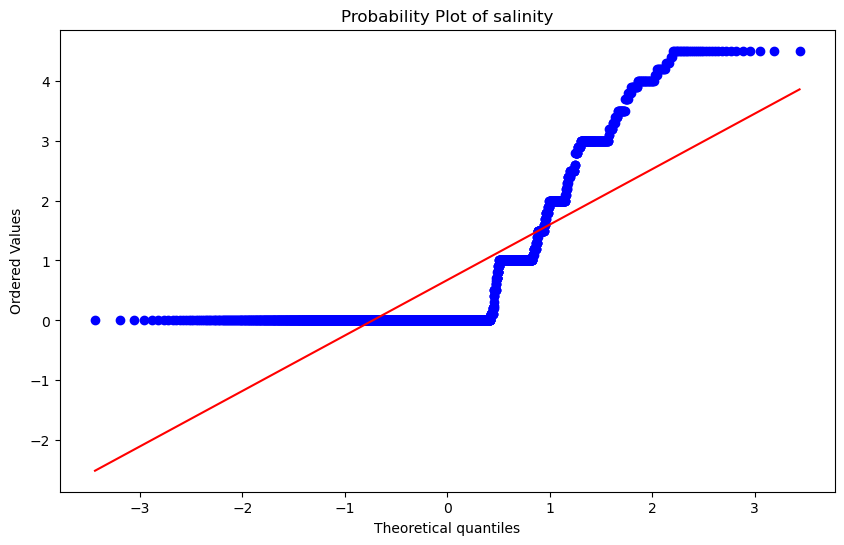

salinity skewness: 1.76


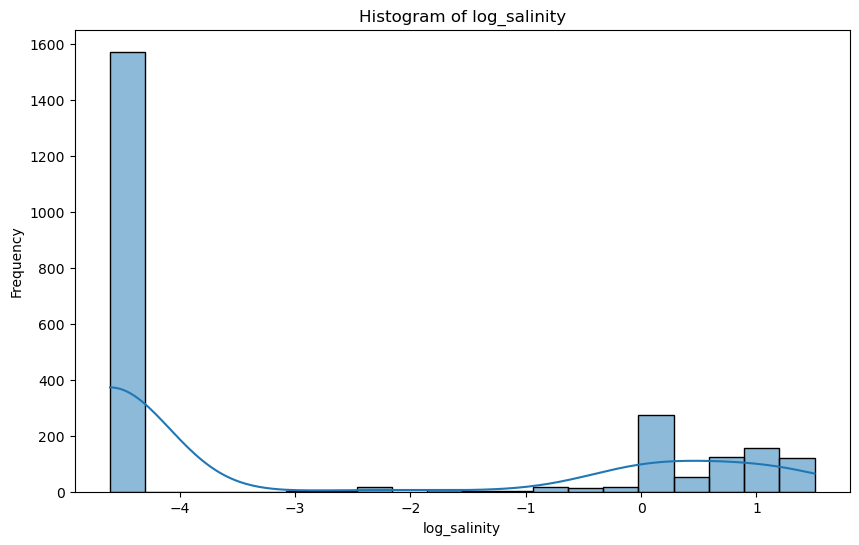

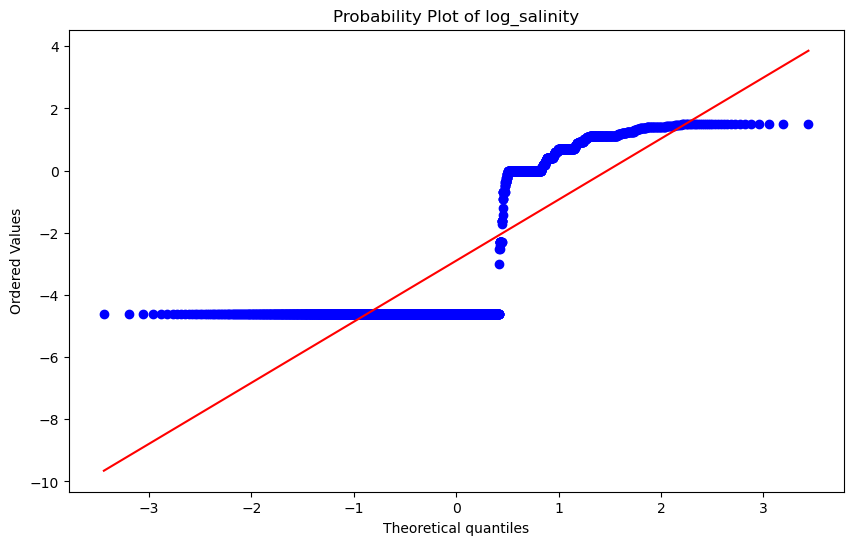

log_salinity skewness: 0.78


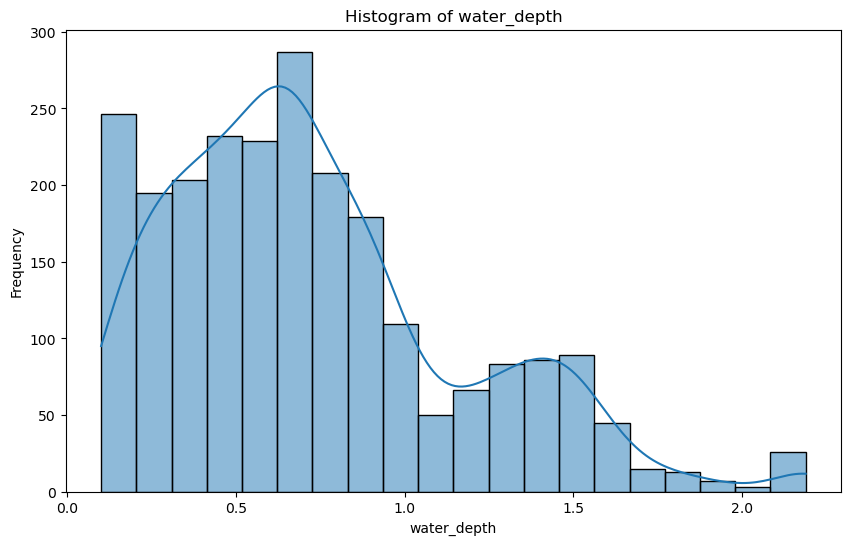

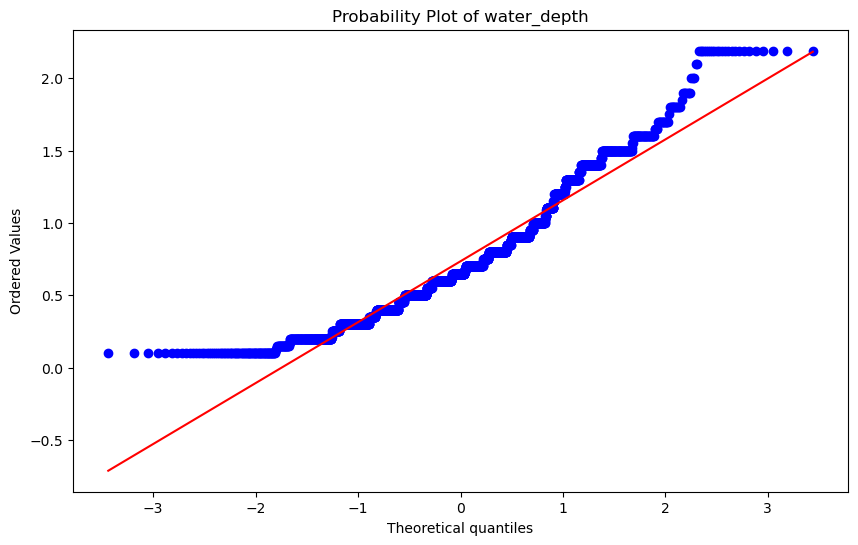

water_depth skewness: 0.88


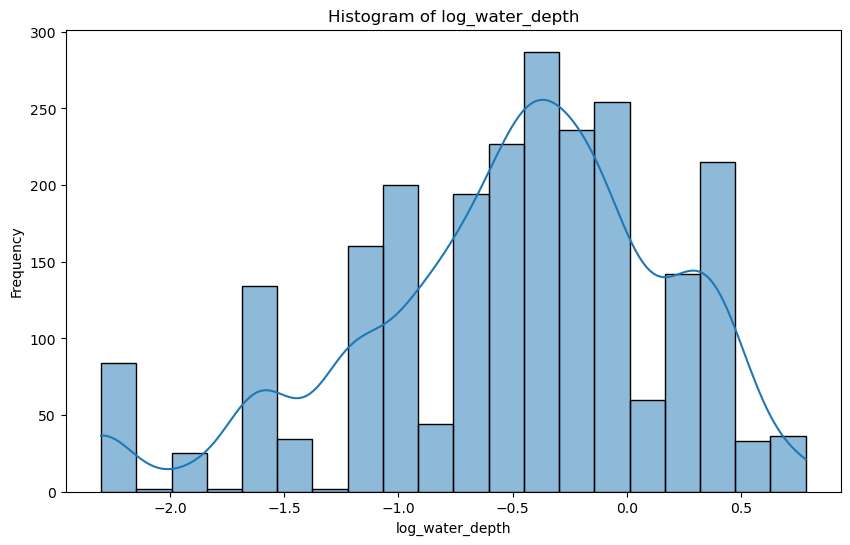

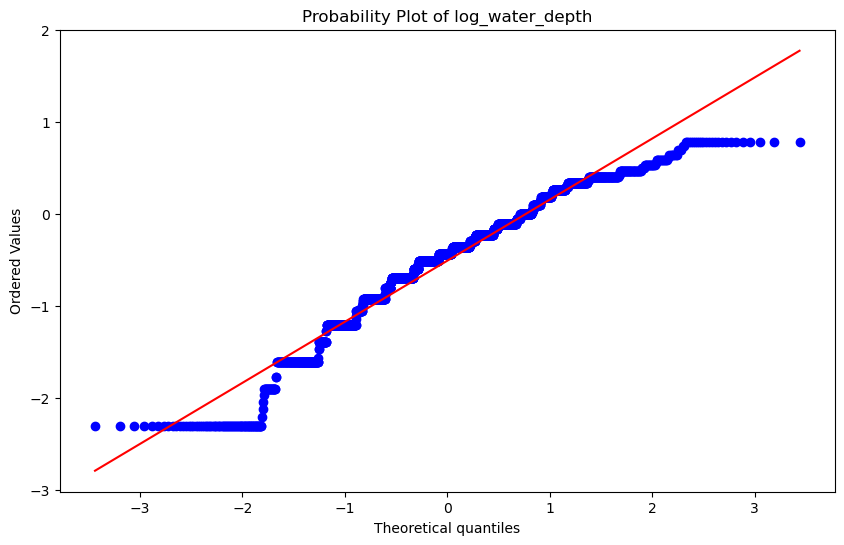

log_water_depth skewness: -0.66


In [40]:
#histogram probability plot and skewness of log salinity and log water depth
# List of variables to check
checklog = ['salinity', 'log_salinity', 'water_depth', 'log_water_depth']

for var in checklog:
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data_noyear[var], kde=True, bins=20)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Plot the probability plot (QQ plot)
    plt.figure(figsize=(10, 6))
    stats.probplot(data_noyear[var].dropna(), dist="norm", plot=plt)
    plt.title(f'Probability Plot of {var}')
    plt.show()

    # Print skewness
    skew_value = data_noyear[var].skew()
    print(f'{var} skewness: {skew_value:.2f}')

## Bivariate Analysis

In [42]:
#creating new dataframe with only numeric values and dropping the original secchi depth column
data_numeric = data_noyear.drop(columns=['site_id', 'secchi_depth', 'time', 'field_tech'])

In [43]:
data_numeric.head()

,salinity,dissolved_oxygen,ph,water_depth,water_temp,airtemp_f,airtemp_c,log_secchi,log_salinity,log_water_depth
read_date,,,,,,,,,,
1994-01-03,1.3,11.7,7.3,0.40,5.9,46.40,8.0,-0.916291,0.262364,-0.916291
1994-01-31,1.5,12.0,7.4,0.35,3.0,36.68,2.6,-1.609438,0.405465,-1.049822
1994-02-07,1.0,10.5,7.2,0.60,5.9,45.68,7.6,-1.386294,0.000000,-0.510826
1994-02-23,1.0,10.1,7.4,0.50,10.0,36.86,2.7,-1.049822,0.000000,-0.693147
1994-02-28,1.0,12.6,7.2,0.40,1.6,32.00,0.0,-1.609438,0.000000,-0.916291


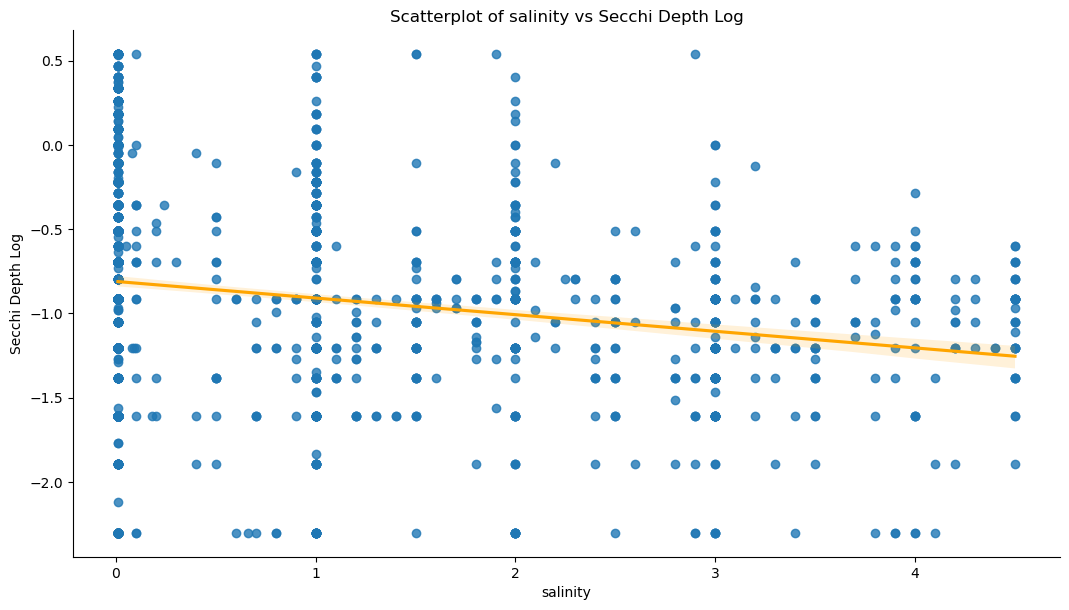

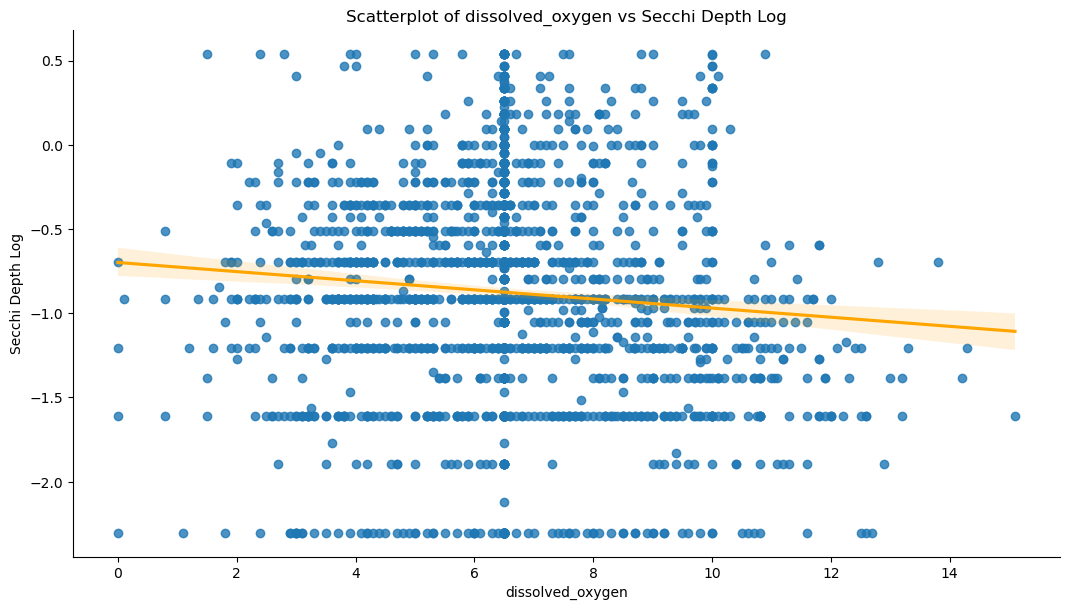

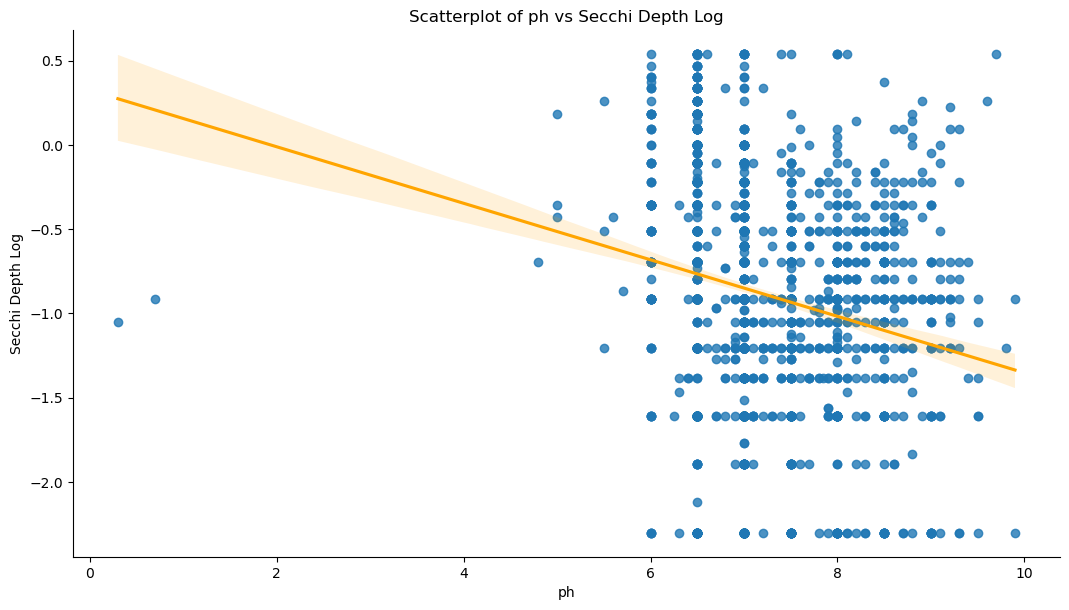

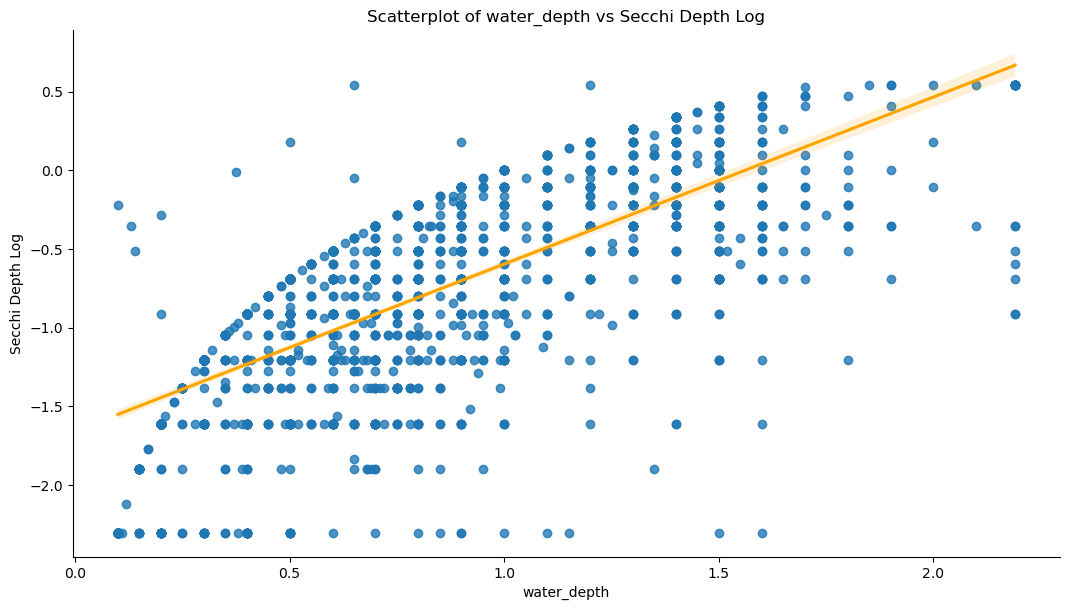

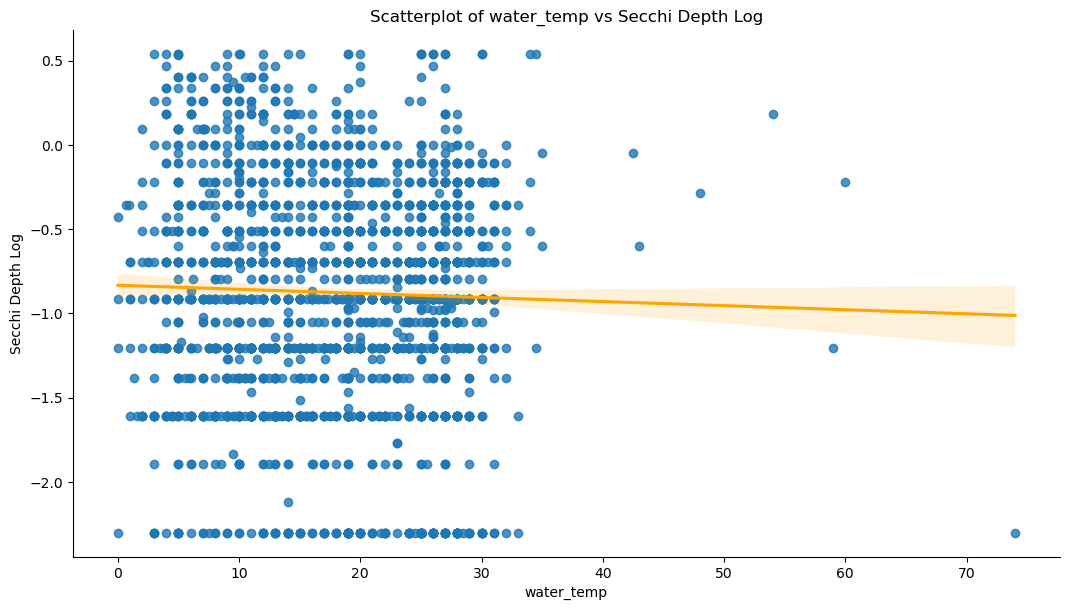

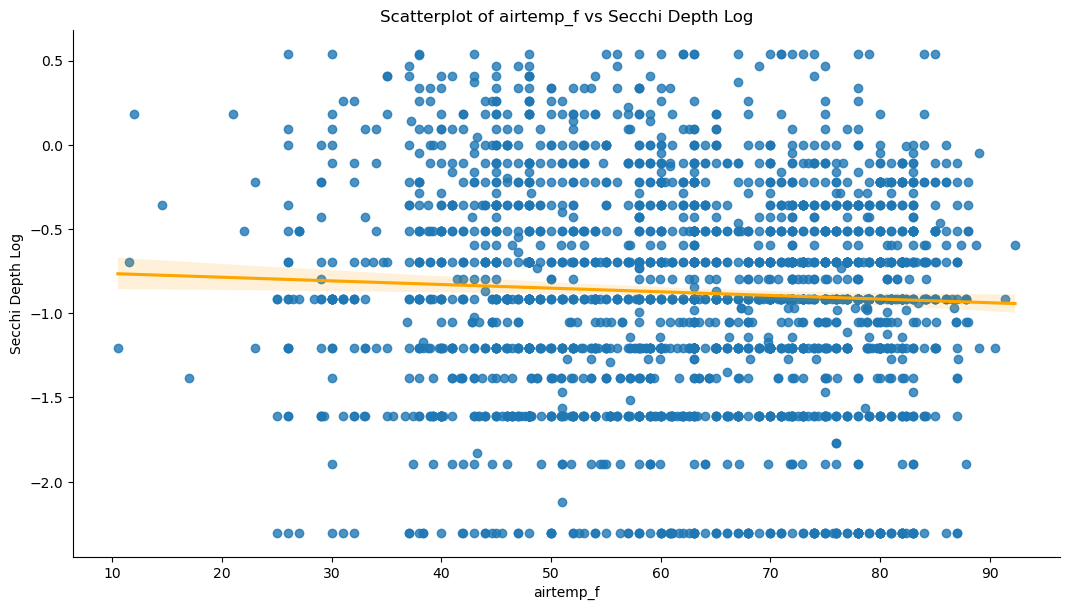

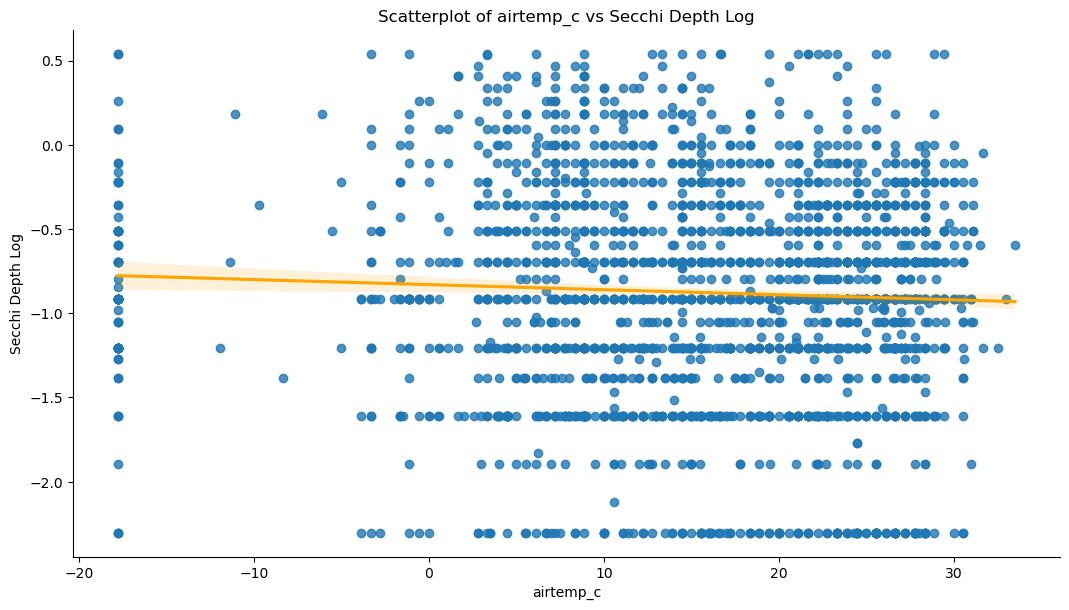

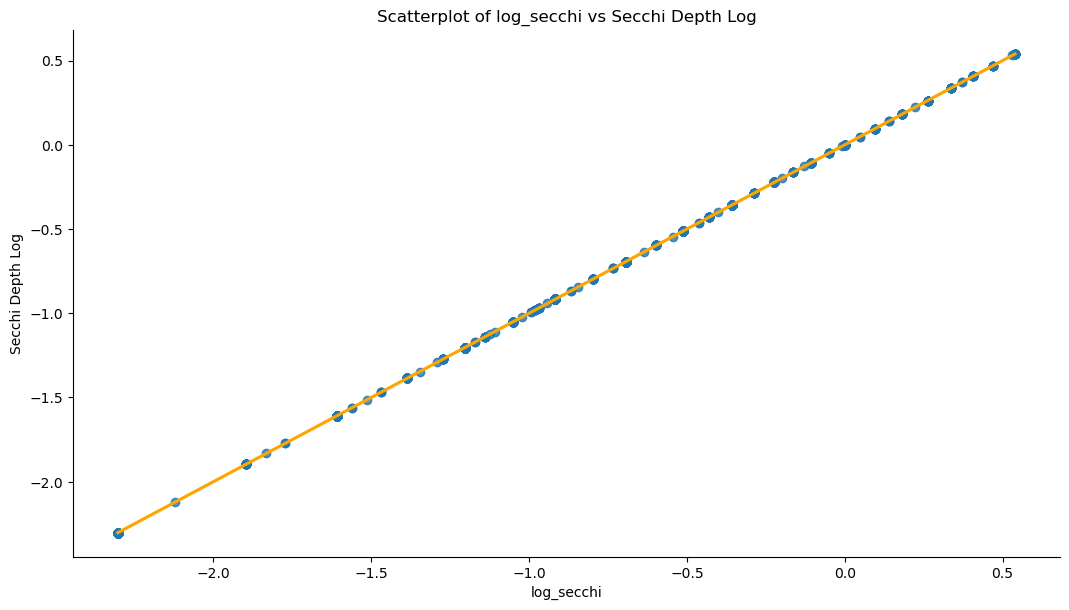

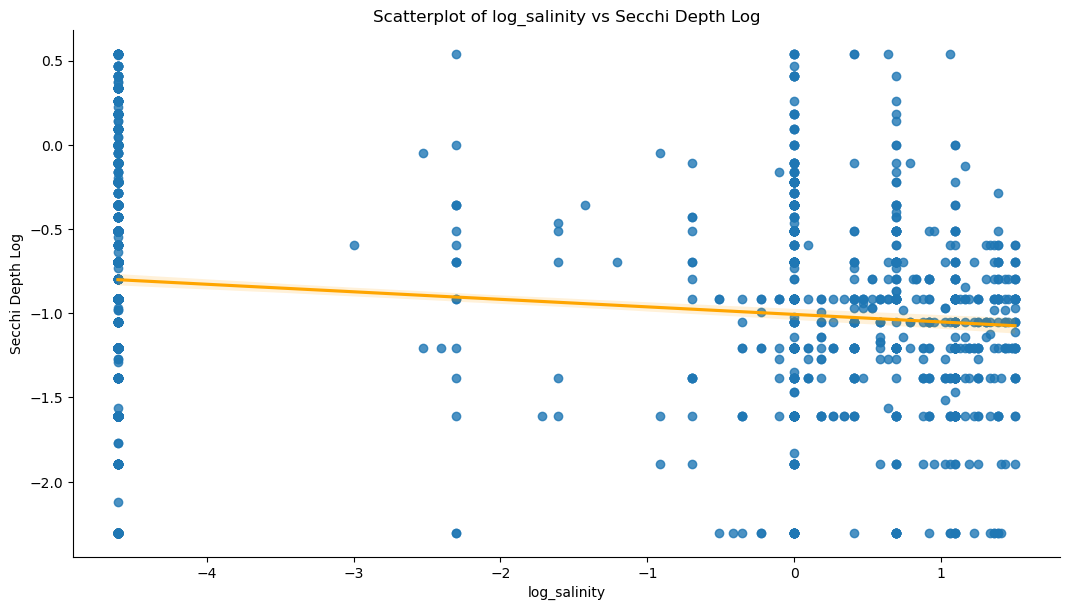

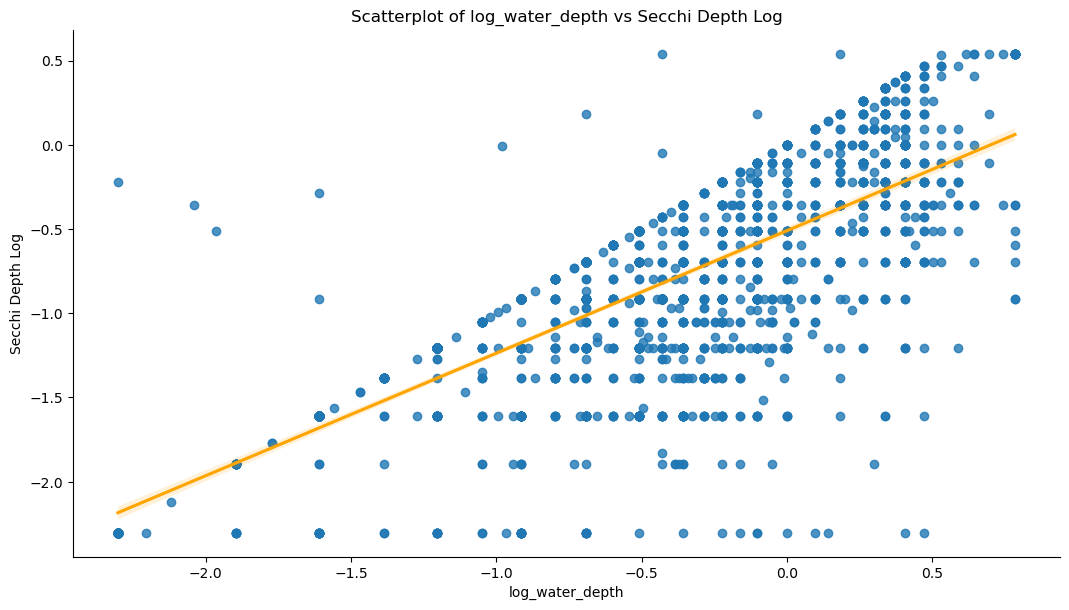

In [44]:
#plotting all numeric variables against log_secchi to look for trends
for column in data_numeric.columns:
    sns.lmplot(x=column, y='log_secchi', data=data_numeric, line_kws={'color': 'orange'}, height=6, aspect=1.8)
    plt.title(f'Scatterplot of {column} vs Secchi Depth Log')
    plt.xlabel(column)
    plt.ylabel('Secchi Depth Log')
plt.show()

#### Here we see largely negative trends when plotting the variables against secchi depth log. Salinty, Dissolved Oxygen, and pH are the most obvious. However water depth (and it's log) are both quite positively correlated. 

## Correlation Matrix of Numeric Variables Against Secchi Depth Log

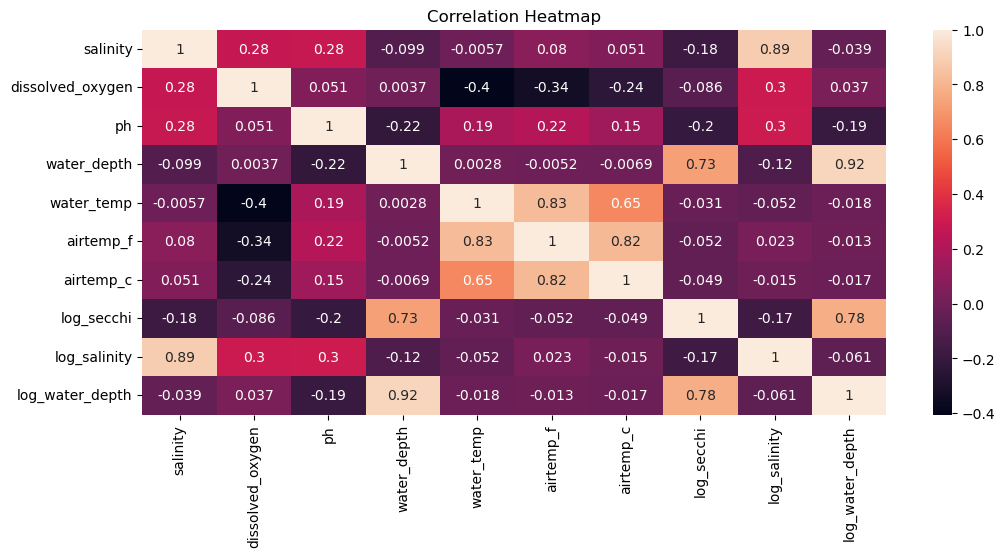

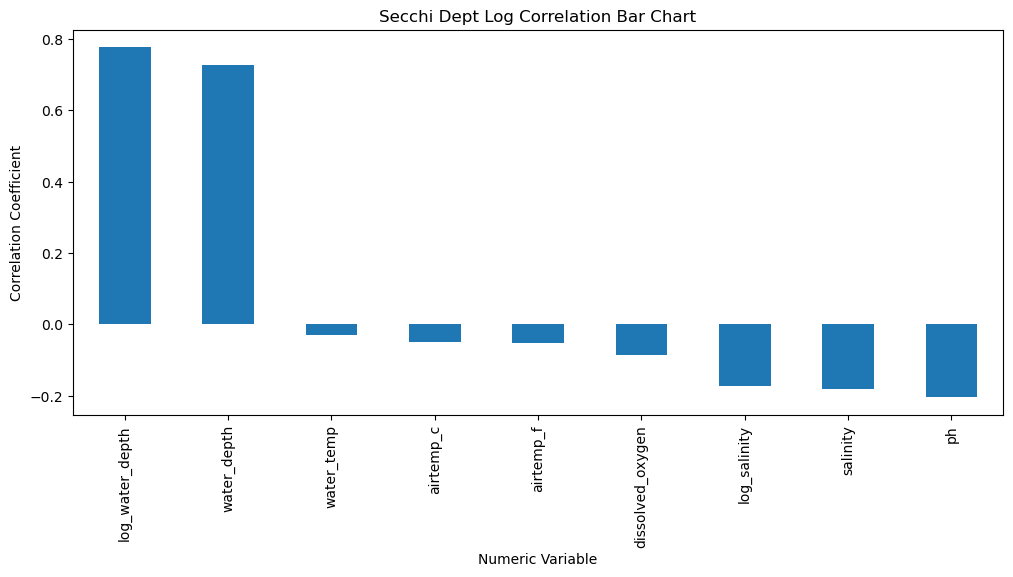

In [46]:
#create a new dataframe that's a correlation matrix of the numeric variables
data_corr = data_numeric.corr()

#plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(data_corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

#new dataframe to only show correlation with secchi depth log and sort the values from largest to smallest, then drop the self-correlation
secchi_corr = data_corr['log_secchi'].sort_values(ascending=False)
secchi_corr = secchi_corr[secchi_corr < 1]

#plotting this correlation coeffieciant data on a bar graph
plt.figure(figsize=(12, 5))
secchi_corr.plot(kind='bar')
plt.title('Secchi Dept Log Correlation Bar Chart')
plt.xlabel('Numeric Variable')
plt.ylabel('Correlation Coefficient')
plt.show()

#### The Log of Water Depth is more highly correlated than regular Water Depth so we will use that. We will also use pH as it is the most negatively correlated, along with Salinity as its correlation is stronger than it's Logs.

In [48]:
data_numeric.columns

Index(['salinity', 'dissolved_oxygen', 'ph', 'water_depth', 'water_temp',
       'airtemp_f', 'airtemp_c', 'log_secchi', 'log_salinity',
       'log_water_depth'],
      dtype='object')

## OLS Regression Modeling

In [50]:
#choosing the significant variables to add to the model, from the last bar chart
sig_vars = ['log_water_depth', 'ph', 'salinity']

dependent_variable = data_numeric['log_secchi']
independent_variables = data_numeric[sig_vars]
independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_secchi   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     1320.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:43:28   Log-Likelihood:                -1116.5
No. Observations:                2371   AIC:                             2241.
Df Residuals:                    2367   BIC:                             2264.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3638      0.077     

#### With an R-squared of 0.626 this model is well suited to this data, explaining ~63% of the Secchi Depth's variation. The next step is to test different combinations of variables to see if any produce a higher R-squared.

In [52]:
#choosing more variables to add to the model
ad_cols = ['dissolved_oxygen', 'water_temp', 'airtemp_f', 'airtemp_c']

#loop through OLS models with each one only differing by the addition of one more variable
for column in ad_cols:
    new_sig_vars = ['log_water_depth', 'ph', 'salinity', column]
    new_dependent_variable = data_numeric['log_secchi']
    new_independent_variables = data_numeric[new_sig_vars]
    new_independent_variables = sm.add_constant(new_independent_variables)
    new_regression_model = sm.OLS(new_dependent_variable, new_independent_variables).fit()
    print(f'\033[1mRegression for model with {column}\033[0m')
    print(new_regression_model.summary())
    print('\033[1m**************************************************************************************************************************************\033[0m')
    print()

Regression for model with dissolved_oxygen
                            OLS Regression Results                            
Dep. Variable:             log_secchi   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:43:28   Log-Likelihood:                -1098.1
No. Observations:                2371   AIC:                             2206.
Df Residuals:                    2366   BIC:                             2235.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### It appears that every version of the model with more variables has a slightly higher R-squared, however they each also have a higher Condition number which makes them less appealing. The original model which considers only Log Water Depth, pH, and Salinity is my final model. 

### Analysis of Regression Coefficients
#### Using this model, we want to extract the coefficients to create a bar plot that identifies which coefficients react most strongly with respect to Secchi Depth.

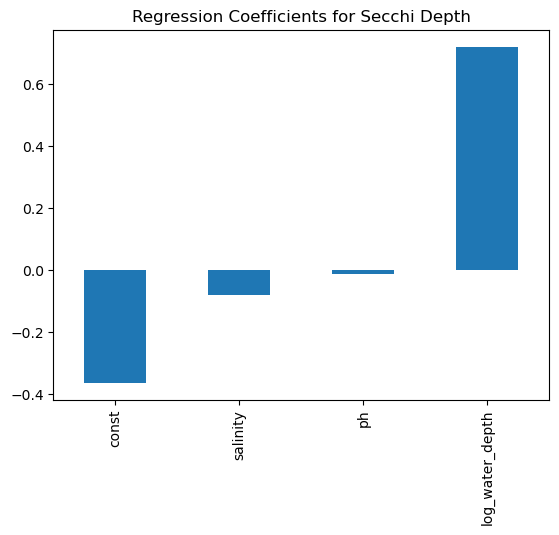

In [55]:
coeffs = regression_model.params
coeffs = coeffs.sort_values(ascending=True)
coeffs.plot(kind='bar')
plt.title('Regression Coefficients for Secchi Depth')
plt.show()

## Conclusion
#### With a regression coefficient of 0.72, the log of water depth is the most highly and strongly correlated variable with Secchi Depth. Salinity is a much lower contributor with a reg-coef of ~-.1, and pH is essentially negligible with -.01.

#### What does this mean logically? Considering the fact that a very shallow body of water does not have much room in its water column to accomodate particulate before becoming turbid enough to inhibit the Secchi Disk's visibility, it makes sense that as a body's depth increases its ability to accumulate particulate before the Secchi Disk is occluded also increases.